In [55]:
from icecream import ic
import torch
from torch import nn
from torch import optim
from torch.nn.parameter import Parameter

In [115]:
def sum_params(params):
    return sum(params)

x = torch.tensor([2.], requires_grad=True)
y = torch.tensor([5.], requires_grad=True)
z = torch.tensor([4.], requires_grad=True)
q = x + y
f = q * z
# q.requires_grad = True
# f.requires_grad = True
# x.requires_grad = True
# y.requires_grad = True
# z.requires_grad = True
optimizer = optim.SGD([x, y, z], lr=1e-2)

In [111]:
q.requires_grad

False

In [109]:
q.requires_grad = False

In [110]:
i = 0
for i in range(100):
    if i % 10 ==0 :
        ic(x, y, z)
#     print(x.grad, y.grad, z.grad)
    optimizer.zero_grad()
    loss = sum_params([x, y, z])
    loss.backward()
    optimizer.step()

ic| x: tensor([2.], requires_grad=True)
    y: tensor([5.], requires_grad=True)
    z: tensor([4.], requires_grad=True)
ic| x: tensor([1.9000], requires_grad=True)
    y: tensor([4.9000], requires_grad=True)
    z: tensor([3.9000], requires_grad=True)
ic| x: tensor([1.8000], requires_grad=True)
    y: tensor([4.8000], requires_grad=True)
    z: tensor([3.8000], requires_grad=True)
ic| x: tensor([1.7000], requires_grad=True)
    y: tensor([4.7000], requires_grad=True)
    z: tensor([3.7000], requires_grad=True)
ic| x: tensor([1.6000], requires_grad=True)
    y: tensor([4.6000], requires_grad=True)
    z: tensor([3.6000], requires_grad=True)
ic| x: tensor([1.5000], requires_grad=True)
    y: tensor([4.5000], requires_grad=True)
    z: tensor([3.5000], requires_grad=True)
ic| x: tensor([1.4000], requires_grad=True)
    y: tensor([4.4000], requires_grad=True)
    z: tensor([3.4000], requires_grad=True)
ic| x: tensor([1.3000], requires_grad=True)
    y: tensor([4.3000], requires_grad=True)


In [121]:
a.grad, b.grad, Q.grad

NameError: name 'a' is not defined

In [56]:
a, b, Q

(tensor([2., 3.], requires_grad=True),
 tensor([6., 4.], requires_grad=True),
 tensor([-12.,  65.], grad_fn=<SubBackward0>))

In [18]:
a, b, Q

(tensor([2., 3.], requires_grad=True),
 tensor([6., 4.], requires_grad=True),
 tensor([-12.,  65.], grad_fn=<SubBackward0>))

In [122]:
# -*- coding: utf-8 -*-
import torch
import math


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Prepare the input tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)
loss_fn = torch.nn.MSELoss(reduction='sum')

# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use RMSprop; the optim package contains many other
# optimization algorithms. The first argument to the RMSprop constructor tells the
# optimizer which Tensors it should update.
learning_rate = 1e-3
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
for t in range(2000):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(xx)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()

linear_layer = model[0]
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

99 1801.9649658203125
199 1173.5460205078125
299 922.2537841796875
399 740.95458984375
499 584.9867553710938
599 451.37469482421875
699 338.5831298828125
799 244.94371032714844
899 169.1317596435547
999 110.06774139404297
1099 66.61687469482422
1199 37.29628372192383
1299 19.982831954956055
1399 11.839418411254883
1499 9.300392150878906
1599 8.953907012939453
1699 8.908979415893555
1799 8.89382553100586
1899 8.90677261352539
1999 8.94371509552002
Result: y = -0.0006919474108144641 + 0.8562460541725159 x + -0.000691934023052454 x^2 + -0.09384617954492569 x^3


In [131]:
# -*- coding: utf-8 -*-
import torch
import math


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Prepare the input tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)
loss_fn = torch.nn.MSELoss(reduction='sum')

# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use RMSprop; the optim package contains many other
# optimization algorithms. The first argument to the RMSprop constructor tells the
# optimizer which Tensors it should update.
learning_rate = 1e-3
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
# Forward pass: compute predicted y by passing x to the model.
y_pred = model(xx)

# Compute and print loss.
loss = loss_fn(y_pred, y)
print(loss.item())

for t in range(2000):
    loss = loss_fn(y_pred, y)
    y_pred = model(xx)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if t % 100 == 99:
        print(loss.item())
    


linear_layer = model[0]
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

14364.525390625
617.2393798828125
56.15489959716797
34.53825378417969
26.530271530151367
20.493711471557617
15.620453834533691
11.797539710998535
9.611949920654297
8.909710884094238
8.819785118103027
8.886579513549805
10.099237442016602
11.652871131896973
9.318570137023926
9.36129093170166
9.690546035766602
9.129755020141602
8.97054672241211
9.427841186523438
9.041616439819336
Result: y = -0.0002991750370711088 + 0.8553643226623535 x + -0.00029917655047029257 x^2 + -0.0947069376707077 x^3


In [71]:
from icecream import ic
import torch
import torch.nn as nn
import torch.optim as optim
decoration = '********************************************************************************'
n_dim = 5

a = nn.Linear(n_dim, 1)
b = nn.Linear(n_dim, 1)

In [62]:
l = (p1(torch.rand(n_dim)) + p2(torch.rand(n_dim))).squeeze()

In [67]:
list(p1.parameters())[1]

Parameter containing:
tensor([-0.0460], requires_grad=True)

In [83]:
p1 = nn.Linear(n_dim, 1)
p2 = nn.Linear(n_dim, 1)
# p1.weight.requires_grad, p1.bias.requires_grad = True, True
# p2.weight.requires_grad, p2.bias.requires_grad = True, True

p1.weight.requires_grad, p1.bias.requires_grad = False, True
p2.weight.requires_grad, p2.bias.requires_grad = False, True

optimizer = optim.Adam(list(p1.parameters()) + list(p2.parameters()))
for i in range(4):
    dummy_loss = (p1(torch.rand(n_dim)) + p2(torch.rand(n_dim))).squeeze()
    optimizer.zero_grad()
    dummy_loss.backward()
    optimizer.step()
    ic(list(p1.parameters()))
    ic({p1.weight.grad})
    ic(list(p2.parameters()))
    ic({p2.weight.grad})
    ic(decoration)

ic| list(p1.parameters()): [Parameter containing:
                           tensor([[-0.0443, -0.4237, -0.3795, -0.3433,  0.2312]]),
                            Parameter containing:
                           tensor([0.4173], requires_grad=True)]
ic| {p1.weight.grad}: {None}
ic| list(p2.parameters()): [Parameter containing:
                           tensor([[ 0.1809, -0.4212, -0.2158,  0.1875,  0.3629]]),
                            Parameter containing:
                           tensor([0.1925], requires_grad=True)]
ic| {p2.weight.grad}: {None}
ic| decoration: '********************************************************************************'
ic| list(p1.parameters()): [Parameter containing:
                           tensor([[-0.0443, -0.4237, -0.3795, -0.3433,  0.2312]]),
                            Parameter containing:
                           tensor([0.4163], requires_grad=True)]
ic| {p1.weight.grad}: {None}
ic| list(p2.parameters()): [Parameter containing:
                 

In [133]:
list(p1.parameters())

[Parameter containing:
 tensor([[ 0.2865, -0.0854,  0.5089],
         [-0.1671,  0.0586,  0.5136]]), Parameter containing:
 tensor([ 0.0342, -0.3689], requires_grad=True)]

In [132]:
n_dim = 3
n_classes = 2
p1 = nn.Linear(n_dim, n_classes)
p2 = nn.Linear(n_dim, n_classes)
# p1.weight.requires_grad, p1.bias.requires_grad = True, True
# p2.weight.requires_grad, p2.bias.requires_grad = True, True

p1.weight.requires_grad, p1.bias.requires_grad = False, True
p2.weight.requires_grad, p2.bias.requires_grad = False, True

optimizer = optim.Adam(list(p1.parameters()) + list(p2.parameters()))
for i in range(4):
    dummy_loss = (p1(torch.rand(n_dim)) + p2(torch.rand(n_dim))).squeeze()
    optimizer.zero_grad()
    dummy_loss.backward()
    optimizer.step()
    ic(list(p1.parameters()))
    ic({p1.weight.grad})
    ic(list(p2.parameters()))
    ic({p2.weight.grad})
    ic(decoration)

RuntimeError: grad can be implicitly created only for scalar outputs

In [113]:
params = torch.tensor([4.])
params.requires_grad_()

print(square(params))
# Do gradient descent
n_optim_steps = int(1e4)
optimizer = torch.optim.SGD([params], 1e-2)

for ii in range(n_optim_steps):
    optimizer.zero_grad()
    loss = square(params)

    print('Step # {}, loss: {}'.format(ii, loss.item()))
    loss.backward()
    # Access gradient if necessary
    grad = params.grad.data
    optimizer.step()

tensor([4.], requires_grad=True)
Step # 0, loss: 4.0
Step # 1, loss: 3.990000009536743
Step # 2, loss: 3.9800000190734863
Step # 3, loss: 3.9700000286102295
Step # 4, loss: 3.9600000381469727
Step # 5, loss: 3.950000047683716
Step # 6, loss: 3.940000057220459
Step # 7, loss: 3.930000066757202
Step # 8, loss: 3.9200000762939453
Step # 9, loss: 3.9100000858306885
Step # 10, loss: 3.9000000953674316
Step # 11, loss: 3.890000104904175
Step # 12, loss: 3.880000114440918
Step # 13, loss: 3.870000123977661
Step # 14, loss: 3.8600001335144043
Step # 15, loss: 3.8500001430511475
Step # 16, loss: 3.8400001525878906
Step # 17, loss: 3.830000162124634
Step # 18, loss: 3.820000171661377
Step # 19, loss: 3.81000018119812
Step # 20, loss: 3.8000001907348633
Step # 21, loss: 3.7900002002716064
Step # 22, loss: 3.7800002098083496
Step # 23, loss: 3.7700002193450928
Step # 24, loss: 3.760000228881836
Step # 25, loss: 3.750000238418579
Step # 26, loss: 3.7400002479553223
Step # 27, loss: 3.73000025749206

Step # 472, loss: -0.7199960947036743
Step # 473, loss: -0.7299960851669312
Step # 474, loss: -0.739996075630188
Step # 475, loss: -0.7499960660934448
Step # 476, loss: -0.7599960565567017
Step # 477, loss: -0.7699960470199585
Step # 478, loss: -0.7799960374832153
Step # 479, loss: -0.7899960279464722
Step # 480, loss: -0.799996018409729
Step # 481, loss: -0.8099960088729858
Step # 482, loss: -0.8199959993362427
Step # 483, loss: -0.8299959897994995
Step # 484, loss: -0.8399959802627563
Step # 485, loss: -0.8499959707260132
Step # 486, loss: -0.85999596118927
Step # 487, loss: -0.8699959516525269
Step # 488, loss: -0.8799959421157837
Step # 489, loss: -0.8899959325790405
Step # 490, loss: -0.8999959230422974
Step # 491, loss: -0.9099959135055542
Step # 492, loss: -0.919995903968811
Step # 493, loss: -0.9299958944320679
Step # 494, loss: -0.9399958848953247
Step # 495, loss: -0.9499958753585815
Step # 496, loss: -0.9599958658218384
Step # 497, loss: -0.9699958562850952
Step # 498, loss:

Step # 1001, loss: -6.01003885269165
Step # 1002, loss: -6.020039081573486
Step # 1003, loss: -6.030039310455322
Step # 1004, loss: -6.040039539337158
Step # 1005, loss: -6.050039768218994
Step # 1006, loss: -6.06003999710083
Step # 1007, loss: -6.070040225982666
Step # 1008, loss: -6.080040454864502
Step # 1009, loss: -6.090040683746338
Step # 1010, loss: -6.100040912628174
Step # 1011, loss: -6.11004114151001
Step # 1012, loss: -6.120041370391846
Step # 1013, loss: -6.130041599273682
Step # 1014, loss: -6.140041828155518
Step # 1015, loss: -6.1500420570373535
Step # 1016, loss: -6.1600422859191895
Step # 1017, loss: -6.170042514801025
Step # 1018, loss: -6.180042743682861
Step # 1019, loss: -6.190042972564697
Step # 1020, loss: -6.200043201446533
Step # 1021, loss: -6.210043430328369
Step # 1022, loss: -6.220043659210205
Step # 1023, loss: -6.230043888092041
Step # 1024, loss: -6.240044116973877
Step # 1025, loss: -6.250044345855713
Step # 1026, loss: -6.260044574737549
Step # 1027, 

Step # 1493, loss: -10.930150985717773
Step # 1494, loss: -10.94015121459961
Step # 1495, loss: -10.950151443481445
Step # 1496, loss: -10.960151672363281
Step # 1497, loss: -10.970151901245117
Step # 1498, loss: -10.980152130126953
Step # 1499, loss: -10.990152359008789
Step # 1500, loss: -11.000152587890625
Step # 1501, loss: -11.010152816772461
Step # 1502, loss: -11.020153045654297
Step # 1503, loss: -11.030153274536133
Step # 1504, loss: -11.040153503417969
Step # 1505, loss: -11.050153732299805
Step # 1506, loss: -11.06015396118164
Step # 1507, loss: -11.070154190063477
Step # 1508, loss: -11.080154418945312
Step # 1509, loss: -11.090154647827148
Step # 1510, loss: -11.100154876708984
Step # 1511, loss: -11.11015510559082
Step # 1512, loss: -11.120155334472656
Step # 1513, loss: -11.130155563354492
Step # 1514, loss: -11.140155792236328
Step # 1515, loss: -11.150156021118164
Step # 1516, loss: -11.16015625
Step # 1517, loss: -11.170156478881836
Step # 1518, loss: -11.180156707763

Step # 1885, loss: -14.850240707397461
Step # 1886, loss: -14.860240936279297
Step # 1887, loss: -14.870241165161133
Step # 1888, loss: -14.880241394042969
Step # 1889, loss: -14.890241622924805
Step # 1890, loss: -14.90024185180664
Step # 1891, loss: -14.910242080688477
Step # 1892, loss: -14.920242309570312
Step # 1893, loss: -14.930242538452148
Step # 1894, loss: -14.940242767333984
Step # 1895, loss: -14.95024299621582
Step # 1896, loss: -14.960243225097656
Step # 1897, loss: -14.970243453979492
Step # 1898, loss: -14.980243682861328
Step # 1899, loss: -14.990243911743164
Step # 1900, loss: -15.000244140625
Step # 1901, loss: -15.010244369506836
Step # 1902, loss: -15.020244598388672
Step # 1903, loss: -15.030244827270508
Step # 1904, loss: -15.040245056152344
Step # 1905, loss: -15.05024528503418
Step # 1906, loss: -15.060245513916016
Step # 1907, loss: -15.070245742797852
Step # 1908, loss: -15.080245971679688
Step # 1909, loss: -15.090246200561523
Step # 1910, loss: -15.10024642

Step # 2401, loss: -20.010358810424805
Step # 2402, loss: -20.02035903930664
Step # 2403, loss: -20.030359268188477
Step # 2404, loss: -20.040359497070312
Step # 2405, loss: -20.05035972595215
Step # 2406, loss: -20.060359954833984
Step # 2407, loss: -20.07036018371582
Step # 2408, loss: -20.080360412597656
Step # 2409, loss: -20.090360641479492
Step # 2410, loss: -20.100360870361328
Step # 2411, loss: -20.110361099243164
Step # 2412, loss: -20.120361328125
Step # 2413, loss: -20.130361557006836
Step # 2414, loss: -20.140361785888672
Step # 2415, loss: -20.150362014770508
Step # 2416, loss: -20.160362243652344
Step # 2417, loss: -20.17036247253418
Step # 2418, loss: -20.180362701416016
Step # 2419, loss: -20.19036293029785
Step # 2420, loss: -20.200363159179688
Step # 2421, loss: -20.210363388061523
Step # 2422, loss: -20.22036361694336
Step # 2423, loss: -20.230363845825195
Step # 2424, loss: -20.24036407470703
Step # 2425, loss: -20.250364303588867
Step # 2426, loss: -20.260364532470

Step # 2883, loss: -24.830469131469727
Step # 2884, loss: -24.840469360351562
Step # 2885, loss: -24.8504695892334
Step # 2886, loss: -24.860469818115234
Step # 2887, loss: -24.87047004699707
Step # 2888, loss: -24.880470275878906
Step # 2889, loss: -24.890470504760742
Step # 2890, loss: -24.900470733642578
Step # 2891, loss: -24.910470962524414
Step # 2892, loss: -24.92047119140625
Step # 2893, loss: -24.930471420288086
Step # 2894, loss: -24.940471649169922
Step # 2895, loss: -24.950471878051758
Step # 2896, loss: -24.960472106933594
Step # 2897, loss: -24.97047233581543
Step # 2898, loss: -24.980472564697266
Step # 2899, loss: -24.9904727935791
Step # 2900, loss: -25.000473022460938
Step # 2901, loss: -25.010473251342773
Step # 2902, loss: -25.02047348022461
Step # 2903, loss: -25.030473709106445
Step # 2904, loss: -25.04047393798828
Step # 2905, loss: -25.050474166870117
Step # 2906, loss: -25.060474395751953
Step # 2907, loss: -25.07047462463379
Step # 2908, loss: -25.080474853515

Step # 3404, loss: -30.04058837890625
Step # 3405, loss: -30.050588607788086
Step # 3406, loss: -30.060588836669922
Step # 3407, loss: -30.070589065551758
Step # 3408, loss: -30.080589294433594
Step # 3409, loss: -30.09058952331543
Step # 3410, loss: -30.100589752197266
Step # 3411, loss: -30.1105899810791
Step # 3412, loss: -30.120590209960938
Step # 3413, loss: -30.130590438842773
Step # 3414, loss: -30.14059066772461
Step # 3415, loss: -30.150590896606445
Step # 3416, loss: -30.16059112548828
Step # 3417, loss: -30.170591354370117
Step # 3418, loss: -30.180591583251953
Step # 3419, loss: -30.19059181213379
Step # 3420, loss: -30.200592041015625
Step # 3421, loss: -30.21059226989746
Step # 3422, loss: -30.220592498779297
Step # 3423, loss: -30.230592727661133
Step # 3424, loss: -30.24059295654297
Step # 3425, loss: -30.250593185424805
Step # 3426, loss: -30.26059341430664
Step # 3427, loss: -30.270593643188477
Step # 3428, loss: -30.280593872070312
Step # 3429, loss: -30.290594100952

Step # 3935, loss: -35.35007095336914
Step # 3936, loss: -35.360069274902344
Step # 3937, loss: -35.37006759643555
Step # 3938, loss: -35.38006591796875
Step # 3939, loss: -35.39006423950195
Step # 3940, loss: -35.400062561035156
Step # 3941, loss: -35.41006088256836
Step # 3942, loss: -35.42005920410156
Step # 3943, loss: -35.430057525634766
Step # 3944, loss: -35.44005584716797
Step # 3945, loss: -35.45005416870117
Step # 3946, loss: -35.460052490234375
Step # 3947, loss: -35.47005081176758
Step # 3948, loss: -35.48004913330078
Step # 3949, loss: -35.490047454833984
Step # 3950, loss: -35.50004577636719
Step # 3951, loss: -35.51004409790039
Step # 3952, loss: -35.520042419433594
Step # 3953, loss: -35.5300407409668
Step # 3954, loss: -35.5400390625
Step # 3955, loss: -35.5500373840332
Step # 3956, loss: -35.560035705566406
Step # 3957, loss: -35.57003402709961
Step # 3958, loss: -35.58003234863281
Step # 3959, loss: -35.590030670166016
Step # 3960, loss: -35.60002899169922
Step # 396

Step # 4421, loss: -40.20925521850586
Step # 4422, loss: -40.21925354003906
Step # 4423, loss: -40.229251861572266
Step # 4424, loss: -40.23925018310547
Step # 4425, loss: -40.24924850463867
Step # 4426, loss: -40.259246826171875
Step # 4427, loss: -40.26924514770508
Step # 4428, loss: -40.27924346923828
Step # 4429, loss: -40.289241790771484
Step # 4430, loss: -40.29924011230469
Step # 4431, loss: -40.30923843383789
Step # 4432, loss: -40.319236755371094
Step # 4433, loss: -40.3292350769043
Step # 4434, loss: -40.3392333984375
Step # 4435, loss: -40.3492317199707
Step # 4436, loss: -40.359230041503906
Step # 4437, loss: -40.36922836303711
Step # 4438, loss: -40.37922668457031
Step # 4439, loss: -40.389225006103516
Step # 4440, loss: -40.39922332763672
Step # 4441, loss: -40.40922164916992
Step # 4442, loss: -40.419219970703125
Step # 4443, loss: -40.42921829223633
Step # 4444, loss: -40.43921661376953
Step # 4445, loss: -40.449214935302734
Step # 4446, loss: -40.45921325683594
Step # 

Step # 4985, loss: -45.84830856323242
Step # 4986, loss: -45.858306884765625
Step # 4987, loss: -45.86830520629883
Step # 4988, loss: -45.87830352783203
Step # 4989, loss: -45.888301849365234
Step # 4990, loss: -45.89830017089844
Step # 4991, loss: -45.90829849243164
Step # 4992, loss: -45.918296813964844
Step # 4993, loss: -45.92829513549805
Step # 4994, loss: -45.93829345703125
Step # 4995, loss: -45.94829177856445
Step # 4996, loss: -45.958290100097656
Step # 4997, loss: -45.96828842163086
Step # 4998, loss: -45.97828674316406
Step # 4999, loss: -45.988285064697266
Step # 5000, loss: -45.99828338623047
Step # 5001, loss: -46.00828170776367
Step # 5002, loss: -46.018280029296875
Step # 5003, loss: -46.02827835083008
Step # 5004, loss: -46.03827667236328
Step # 5005, loss: -46.048274993896484
Step # 5006, loss: -46.05827331542969
Step # 5007, loss: -46.06827163696289
Step # 5008, loss: -46.078269958496094
Step # 5009, loss: -46.0882682800293
Step # 5010, loss: -46.0982666015625
Step #

Step # 5510, loss: -51.09742736816406
Step # 5511, loss: -51.107425689697266
Step # 5512, loss: -51.11742401123047
Step # 5513, loss: -51.12742233276367
Step # 5514, loss: -51.137420654296875
Step # 5515, loss: -51.14741897583008
Step # 5516, loss: -51.15741729736328
Step # 5517, loss: -51.167415618896484
Step # 5518, loss: -51.17741394042969
Step # 5519, loss: -51.18741226196289
Step # 5520, loss: -51.197410583496094
Step # 5521, loss: -51.2074089050293
Step # 5522, loss: -51.2174072265625
Step # 5523, loss: -51.2274055480957
Step # 5524, loss: -51.237403869628906
Step # 5525, loss: -51.24740219116211
Step # 5526, loss: -51.25740051269531
Step # 5527, loss: -51.267398834228516
Step # 5528, loss: -51.27739715576172
Step # 5529, loss: -51.28739547729492
Step # 5530, loss: -51.297393798828125
Step # 5531, loss: -51.30739212036133
Step # 5532, loss: -51.31739044189453
Step # 5533, loss: -51.327388763427734
Step # 5534, loss: -51.33738708496094
Step # 5535, loss: -51.34738540649414
Step # 

Step # 6063, loss: -56.62649917602539
Step # 6064, loss: -56.636497497558594
Step # 6065, loss: -56.6464958190918
Step # 6066, loss: -56.656494140625
Step # 6067, loss: -56.6664924621582
Step # 6068, loss: -56.676490783691406
Step # 6069, loss: -56.68648910522461
Step # 6070, loss: -56.69648742675781
Step # 6071, loss: -56.706485748291016
Step # 6072, loss: -56.71648406982422
Step # 6073, loss: -56.72648239135742
Step # 6074, loss: -56.736480712890625
Step # 6075, loss: -56.74647903442383
Step # 6076, loss: -56.75647735595703
Step # 6077, loss: -56.766475677490234
Step # 6078, loss: -56.77647399902344
Step # 6079, loss: -56.78647232055664
Step # 6080, loss: -56.796470642089844
Step # 6081, loss: -56.80646896362305
Step # 6082, loss: -56.81646728515625
Step # 6083, loss: -56.82646560668945
Step # 6084, loss: -56.836463928222656
Step # 6085, loss: -56.84646224975586
Step # 6086, loss: -56.85646057128906
Step # 6087, loss: -56.866458892822266
Step # 6088, loss: -56.87645721435547
Step # 6

Step # 6607, loss: -62.06558609008789
Step # 6608, loss: -62.075584411621094
Step # 6609, loss: -62.0855827331543
Step # 6610, loss: -62.0955810546875
Step # 6611, loss: -62.1055793762207
Step # 6612, loss: -62.115577697753906
Step # 6613, loss: -62.12557601928711
Step # 6614, loss: -62.13557434082031
Step # 6615, loss: -62.145572662353516
Step # 6616, loss: -62.15557098388672
Step # 6617, loss: -62.16556930541992
Step # 6618, loss: -62.175567626953125
Step # 6619, loss: -62.18556594848633
Step # 6620, loss: -62.19556427001953
Step # 6621, loss: -62.205562591552734
Step # 6622, loss: -62.21556091308594
Step # 6623, loss: -62.22555923461914
Step # 6624, loss: -62.235557556152344
Step # 6625, loss: -62.24555587768555
Step # 6626, loss: -62.25555419921875
Step # 6627, loss: -62.26555252075195
Step # 6628, loss: -62.275550842285156
Step # 6629, loss: -62.28554916381836
Step # 6630, loss: -62.29554748535156
Step # 6631, loss: -62.305545806884766
Step # 6632, loss: -62.31554412841797
Step # 

Step # 7165, loss: -67.64604187011719
Step # 7166, loss: -67.65604400634766
Step # 7167, loss: -67.66604614257812
Step # 7168, loss: -67.6760482788086
Step # 7169, loss: -67.68605041503906
Step # 7170, loss: -67.69605255126953
Step # 7171, loss: -67.7060546875
Step # 7172, loss: -67.71605682373047
Step # 7173, loss: -67.72605895996094
Step # 7174, loss: -67.7360610961914
Step # 7175, loss: -67.74606323242188
Step # 7176, loss: -67.75606536865234
Step # 7177, loss: -67.76606750488281
Step # 7178, loss: -67.77606964111328
Step # 7179, loss: -67.78607177734375
Step # 7180, loss: -67.79607391357422
Step # 7181, loss: -67.80607604980469
Step # 7182, loss: -67.81607818603516
Step # 7183, loss: -67.82608032226562
Step # 7184, loss: -67.8360824584961
Step # 7185, loss: -67.84608459472656
Step # 7186, loss: -67.85608673095703
Step # 7187, loss: -67.8660888671875
Step # 7188, loss: -67.87609100341797
Step # 7189, loss: -67.88609313964844
Step # 7190, loss: -67.8960952758789
Step # 7191, loss: -6

Step # 7655, loss: -72.54708862304688
Step # 7656, loss: -72.55709075927734
Step # 7657, loss: -72.56709289550781
Step # 7658, loss: -72.57709503173828
Step # 7659, loss: -72.58709716796875
Step # 7660, loss: -72.59709930419922
Step # 7661, loss: -72.60710144042969
Step # 7662, loss: -72.61710357666016
Step # 7663, loss: -72.62710571289062
Step # 7664, loss: -72.6371078491211
Step # 7665, loss: -72.64710998535156
Step # 7666, loss: -72.65711212158203
Step # 7667, loss: -72.6671142578125
Step # 7668, loss: -72.67711639404297
Step # 7669, loss: -72.68711853027344
Step # 7670, loss: -72.6971206665039
Step # 7671, loss: -72.70712280273438
Step # 7672, loss: -72.71712493896484
Step # 7673, loss: -72.72712707519531
Step # 7674, loss: -72.73712921142578
Step # 7675, loss: -72.74713134765625
Step # 7676, loss: -72.75713348388672
Step # 7677, loss: -72.76713562011719
Step # 7678, loss: -72.77713775634766
Step # 7679, loss: -72.78713989257812
Step # 7680, loss: -72.7971420288086
Step # 7681, los

Step # 8220, loss: -78.19829559326172
Step # 8221, loss: -78.20829772949219
Step # 8222, loss: -78.21829986572266
Step # 8223, loss: -78.22830200195312
Step # 8224, loss: -78.2383041381836
Step # 8225, loss: -78.24830627441406
Step # 8226, loss: -78.25830841064453
Step # 8227, loss: -78.268310546875
Step # 8228, loss: -78.27831268310547
Step # 8229, loss: -78.28831481933594
Step # 8230, loss: -78.2983169555664
Step # 8231, loss: -78.30831909179688
Step # 8232, loss: -78.31832122802734
Step # 8233, loss: -78.32832336425781
Step # 8234, loss: -78.33832550048828
Step # 8235, loss: -78.34832763671875
Step # 8236, loss: -78.35832977294922
Step # 8237, loss: -78.36833190917969
Step # 8238, loss: -78.37833404541016
Step # 8239, loss: -78.38833618164062
Step # 8240, loss: -78.3983383178711
Step # 8241, loss: -78.40834045410156
Step # 8242, loss: -78.41834259033203
Step # 8243, loss: -78.4283447265625
Step # 8244, loss: -78.43834686279297
Step # 8245, loss: -78.44834899902344
Step # 8246, loss:

Step # 8769, loss: -83.68946838378906
Step # 8770, loss: -83.69947052001953
Step # 8771, loss: -83.70947265625
Step # 8772, loss: -83.71947479248047
Step # 8773, loss: -83.72947692871094
Step # 8774, loss: -83.7394790649414
Step # 8775, loss: -83.74948120117188
Step # 8776, loss: -83.75948333740234
Step # 8777, loss: -83.76948547363281
Step # 8778, loss: -83.77948760986328
Step # 8779, loss: -83.78948974609375
Step # 8780, loss: -83.79949188232422
Step # 8781, loss: -83.80949401855469
Step # 8782, loss: -83.81949615478516
Step # 8783, loss: -83.82949829101562
Step # 8784, loss: -83.8395004272461
Step # 8785, loss: -83.84950256347656
Step # 8786, loss: -83.85950469970703
Step # 8787, loss: -83.8695068359375
Step # 8788, loss: -83.87950897216797
Step # 8789, loss: -83.88951110839844
Step # 8790, loss: -83.8995132446289
Step # 8791, loss: -83.90951538085938
Step # 8792, loss: -83.91951751708984
Step # 8793, loss: -83.92951965332031
Step # 8794, loss: -83.93952178955078
Step # 8795, loss: 

Step # 9331, loss: -89.3106689453125
Step # 9332, loss: -89.32067108154297
Step # 9333, loss: -89.33067321777344
Step # 9334, loss: -89.3406753540039
Step # 9335, loss: -89.35067749023438
Step # 9336, loss: -89.36067962646484
Step # 9337, loss: -89.37068176269531
Step # 9338, loss: -89.38068389892578
Step # 9339, loss: -89.39068603515625
Step # 9340, loss: -89.40068817138672
Step # 9341, loss: -89.41069030761719
Step # 9342, loss: -89.42069244384766
Step # 9343, loss: -89.43069458007812
Step # 9344, loss: -89.4406967163086
Step # 9345, loss: -89.45069885253906
Step # 9346, loss: -89.46070098876953
Step # 9347, loss: -89.470703125
Step # 9348, loss: -89.48070526123047
Step # 9349, loss: -89.49070739746094
Step # 9350, loss: -89.5007095336914
Step # 9351, loss: -89.51071166992188
Step # 9352, loss: -89.52071380615234
Step # 9353, loss: -89.53071594238281
Step # 9354, loss: -89.54071807861328
Step # 9355, loss: -89.55072021484375
Step # 9356, loss: -89.56072235107422
Step # 9357, loss: -8

Step # 9925, loss: -95.25193786621094
Step # 9926, loss: -95.2619400024414
Step # 9927, loss: -95.27194213867188
Step # 9928, loss: -95.28194427490234
Step # 9929, loss: -95.29194641113281
Step # 9930, loss: -95.30194854736328
Step # 9931, loss: -95.31195068359375
Step # 9932, loss: -95.32195281982422
Step # 9933, loss: -95.33195495605469
Step # 9934, loss: -95.34195709228516
Step # 9935, loss: -95.35195922851562
Step # 9936, loss: -95.3619613647461
Step # 9937, loss: -95.37196350097656
Step # 9938, loss: -95.38196563720703
Step # 9939, loss: -95.3919677734375
Step # 9940, loss: -95.40196990966797
Step # 9941, loss: -95.41197204589844
Step # 9942, loss: -95.4219741821289
Step # 9943, loss: -95.43197631835938
Step # 9944, loss: -95.44197845458984
Step # 9945, loss: -95.45198059082031
Step # 9946, loss: -95.46198272705078
Step # 9947, loss: -95.47198486328125
Step # 9948, loss: -95.48198699951172
Step # 9949, loss: -95.49198913574219
Step # 9950, loss: -95.50199127197266
Step # 9951, los

In [301]:
def my_loss(output, target):
    loss = torch.mean((output - target)**2)
    return loss

mse = nn.MSELoss()
model = nn.Linear(2, 2)
x = torch.randn(1, 2)
target = torch.randn(1, 2)
output = model(x)
loss = my_loss(output, target)
ic(loss)
ic(mse(output, target))
loss.backward()

ic| loss: tensor(2.2344, grad_fn=<MeanBackward0>)
ic| mse(output, target): tensor(2.2344, grad_fn=<MseLossBackward>)


In [139]:
print(model.weight.grad)

tensor([[ 0.2456,  0.0893],
        [-0.1984, -0.0722]])


In [329]:
sigmoid(torch.tensor([0.,1.]))

tensor([0.5000, 0.7311])

In [424]:
t = torch.tensor([1.,1.,1.,1.,0.,0.,0.])
logits = torch.tensor([-0.5495,  0.0716,  0.3836,  0.5488,  1.5662,  1.3015,  1.6924, -0.4651])

In [421]:
sigmoid(torch.tensor(1))

tensor(0.7311)

In [433]:
bcewithlo = nn.BCEWithLogitsLoss()
bcelo = nn.BCEWithLogitsLoss()
loss = nn.BCELoss()
ce = nn.CrossEntropyLoss()
sigmoid = nn.Sigmoid()
softmax = nn.Softmax()
ic(loss(input=sigmoid(logits), target=logits))
ic(bcelo(logits, logits))

ic| loss(input=sigmoid(logits), target=logits): tensor(0.0947)
ic| bcelo(logits, logits): tensor(0.0947)


tensor(0.0947)

In [374]:
t.unsqueeze(0)

tensor([[0., 1.]])

In [389]:
torch.LongTensor(t[1].unsqueeze(0))

TypeError: expected TensorOptions(dtype=__int64, device=cpu, layout=Strided, requires_grad=false (default), pinned_memory=false (default), memory_format=(nullopt)) (got TensorOptions(dtype=float, device=cpu, layout=Strided, requires_grad=false (default), pinned_memory=false (default), memory_format=(nullopt)))

In [405]:
softmax(t)

C:\Users\asher\Anaconda3\envs\explainability\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


tensor([0.2689, 0.7311])

In [406]:
ce(t.unsqueeze(0), t[1].unsqueeze(0).long())

tensor(0.3133)

In [445]:
import numpy as np
from torch.nn import functional

In [354]:
-0.5 * (np.log(.5) + 1 * np.log(.7311))

0.5031761051214061

In [350]:
sigmoid(torch.tensor([0,1]))

tensor([0.5000, 0.7311])

In [ ]:
-0.5 * np.log10(1) + 1 * np.log10(1)

In [451]:
t = torch.randn(2, 3)

In [452]:
t.shape

torch.Size([2, 3])

In [462]:
t_softmax = functional.softmax(t, dim=0)

In [463]:
t_softmax

tensor([[0.5536, 0.3933, 0.2482],
        [0.4464, 0.6067, 0.7518]])

In [455]:
.1686+ .5681+.2633

1.0

In [457]:
sum([0.0751, 0.4841, 0.4407])

0.9998999999999999

In [465]:
a = torch.tensor([[0.0837, 0.0699, 0.0724, 0.0634, 0.1967, 0.0772, 0.4366],
            [0.0570, 0.2260, 0.2952, 0.0441, 0.0292, 0.2351, 0.1134],
            [0.0789, 0.2407, 0.2317, 0.0663, 0.0087, 0.3230, 0.0508],
            [0.2314, 0.0868, 0.0980, 0.2152, 0.0756, 0.2302, 0.0628],
            [0.1312, 0.1074, 0.0714, 0.2149, 0.1998, 0.1300, 0.1453],
            [0.0612, 0.4122, 0.1505, 0.0984, 0.0299, 0.1724, 0.0753],
            [0.1813, 0.0552, 0.0775, 0.1288, 0.2247, 0.0691, 0.2634]])

In [467]:
a.shape

torch.Size([7, 7])

In [474]:
a[3].sum()

tensor(1.0000)

In [477]:
a = torch.randn(4, 3)

In [481]:
b = torch.tensor([1,1,1])

In [482]:
a.shape, b.shape

(torch.Size([4, 3]), torch.Size([3]))

In [485]:
a

tensor([[ 1.0385,  0.2231,  2.6792],
        [ 1.3304,  0.6685,  1.6752],
        [-0.5599, -0.7276,  0.7887],
        [ 0.0322,  1.2718, -0.2046]])

In [483]:
a + b

tensor([[ 1.0385,  0.2231,  2.6792],
        [ 1.3304,  0.6685,  1.6752],
        [-0.5599, -0.7276,  0.7887],
        [ 0.0322,  1.2718, -0.2046]])

attention_scores = torch.randn(1, 2, 3, 3)
x_attention = torch.randn(3)

In [694]:
x_attention[0].item()

0.16294582188129425

In [699]:
x_attention = sigmoid(x_attention)
attention_probs = functional.softmax(attention_scores.float(), dim=-1)

In [700]:
attention_probs

tensor([[[[0.3454, 0.5223, 0.1322],
          [0.1329, 0.5197, 0.3474],
          [0.2647, 0.3544, 0.3809]],

         [[0.4946, 0.1714, 0.3340],
          [0.1237, 0.2994, 0.5770],
          [0.1394, 0.1307, 0.7300]]]])

In [704]:
x_attention = torch.tensor([.1629, 0.4527, 0.6506])
x_attention

tensor([0.1629, 0.4527, 0.6506])

attention_probs_sigmoid_copy

In [710]:
attention_probs_sigmoid

tensor([[[[0.0563, 0.2365, 0.0860],
          [0.0217, 0.2353, 0.2260],
          [0.0431, 0.1605, 0.2478]],

         [[0.0806, 0.0776, 0.2173],
          [0.0202, 0.1355, 0.3754],
          [0.0227, 0.0591, 0.4749]]]])

In [712]:
attention_probs_sigmoid[0][0][0]

tensor([0.0563, 0.2365, 0.0860])

In [678]:
attention_probs_sigmoid / attention_probs_sigmoid.sum(-1, keepdim=True)

tensor([[[[0.1486, 0.6243, 0.2271],
          [0.0449, 0.4872, 0.4680],
          [0.0955, 0.3555, 0.5490]],

         [[0.2146, 0.2066, 0.5787],
          [0.0379, 0.2552, 0.7069],
          [0.0408, 0.1062, 0.8530]]]])

In [755]:
bce = nn.BCELoss(reduction='mean')

In [732]:
sigmoid(x_attention[0]), sigmoid(x_attention[1]), sigmoid(x_attention[2])

(tensor(0.5406), tensor(0.6113), tensor(0.6571))

In [733]:
sigmoid(x_attention)

tensor([0.5406, 0.6113, 0.6571])

In [734]:
bce(sigmoid(x_attention[0]), torch.tensor(0.)), bce(sigmoid(x_attention[1]), torch.tensor(0.)), bce(sigmoid(x_attention[2]), torch.tensor(0.))

(tensor(0.7779), tensor(0.9449), tensor(1.0704))

In [754]:
round(sum([bce(sigmoid(x_attention[0]), torch.tensor(0.)).item(), bce(sigmoid(x_attention[1]), torch.tensor(0.)).item(), bce(sigmoid(x_attention[2]), torch.tensor(0.)).item()]) / 3, 4)

0.9311

In [731]:
bce(sigmoid(x_attention[0]), torch.tensor(0.)) + bce(sigmoid(x_attention[1]), torch.tensor(0.)) + bce(sigmoid(x_attention[2]), torch.tensor(0.))

tensor(2.7933)

In [742]:
bce(sigmoid(x_attention), torch.tensor([0.,0.,0.]))

tensor(0.9311)

In [736]:
bcelo(x_attention, torch.tensor([0.,0.,0.]))

tensor(0.9311)

In [740]:
[np.log(sigmoid(p)) for p in x_attention]

[tensor(-0.6150), tensor(-0.4922), tensor(-0.4198)]

a = torch.tensor([[[[1,1,1],[2,2,2],[3,3,3]], [[4,4,4],[5,5,5],[6,6,6]]]])
b = torch.tensor([2,4,777])

In [668]:
attention_probs

tensor([[[[-1.4313, -1.2167,  0.7208],
          [-1.3098,  0.8365,  0.1041],
          [-0.5649,  0.1689, -0.1898]],

         [[-1.3917,  0.4306, -0.3459],
          [-1.2224,  0.3689, -0.3138],
          [ 1.5577,  0.9229, -0.0665]]]])

In [571]:
a_softmax = functional.softmax(a.float(), dim=-1)

In [584]:
0.2936 + 0.3273 + 0.3175

0.9384

In [583]:
b

tensor([2, 4, 3])

In [604]:
res = (a_softmax * sigmoid(b))

In [613]:
res

tensor([[[[0.2936, 0.3273, 0.3333],
          [0.2936, 0.3273, 0.3333],
          [0.2936, 0.3273, 0.3333]],

         [[0.2936, 0.3273, 0.3333],
          [0.2936, 0.3273, 0.3333],
          [0.2936, 0.3273, 0.3333]]]])

In [630]:
res[0][0][0].sum().item()

0.9542702436447144

In [620]:
res[0][0][0] / res[0][0][0].sum()

tensor([0.3077, 0.3430, 0.3493])

In [644]:
res.shape

torch.Size([1, 2, 3, 3])

In [648]:
res.sum(-1, keepdim=True)

tensor([[[[0.9543],
          [0.9543],
          [0.9543]],

         [[0.9543],
          [0.9543],
          [0.9543]]]])

In [660]:
torch.sum((res / res.sum(-1, keepdim=True)), dim=-1)

tensor([[[1., 1., 1.],
         [1., 1., 1.]]])

In [611]:
res

tensor([[[[0.2936, 0.3273, 0.3333],
          [0.2936, 0.3273, 0.3333],
          [0.2936, 0.3273, 0.3333]],

         [[0.2936, 0.3273, 0.3333],
          [0.2936, 0.3273, 0.3333],
          [0.2936, 0.3273, 0.3333]]]])

In [610]:
res / torch.sum(res, dim=-1).view(1, -1)

RuntimeError: The size of tensor a (3) must match the size of tensor b (6) at non-singleton dimension 3

In [594]:
res

tensor([[[[0.0513, 0.0572, 0.0582],
          [0.0513, 0.0572, 0.0582],
          [0.0513, 0.0572, 0.0582]],

         [[0.0513, 0.0572, 0.0582],
          [0.0513, 0.0572, 0.0582],
          [0.0513, 0.0572, 0.0582]]]])

In [587]:
torch.sum(a_softmax * sigmoid(b), dim=-1)

tensor([[[0.9543, 0.9543, 0.9543],
         [0.9543, 0.9543, 0.9543]]])

In [554]:
d = a * b

In [555]:
d

tensor([[[[ 2,  4,  3],
          [ 4,  8,  6],
          [ 6, 12,  9]],

         [[ 8, 16, 12],
          [10, 20, 15],
          [12, 24, 18]]]])

In [559]:
a.shape, b.shape, d.shape

(torch.Size([1, 2, 3, 3]), torch.Size([3]), torch.Size([1, 2, 3, 3]))

In [560]:
assert a.shape == d.shape

In [563]:
sigmoid(b) * a

tensor([[[[0.8808, 0.9820, 0.9526],
          [1.7616, 1.9640, 1.9051],
          [2.6424, 2.9460, 2.8577]],

         [[3.5232, 3.9281, 3.8103],
          [4.4040, 4.9101, 4.7629],
          [5.2848, 5.8921, 5.7154]]]])

In [757]:
a = torch.tensor([0.7493, 0.2749, 0.4410, 0.4280, 0.2542, 0.6126, 0.3785, 0.2614, 0.8863,
        0.2433, 0.4535, 0.5696, 0.5330, 0.8197, 0.3760, 0.4358, 0.3909, 0.6741,
        0.4869, 0.6943, 0.5633, 0.2319, 0.7081, 0.5389, 0.1509, 0.4676, 0.6108,
        0.3140, 0.8054, 0.5166, 0.5073, 0.4113, 0.5365, 0.4634, 0.7156, 0.6384,
        0.7231, 0.6599, 0.1915, 0.6389, 0.6596, 0.8418, 0.3874, 0.3851, 0.7639,
        0.2154, 0.2796, 0.5591, 0.5086, 0.8032, 0.7680, 0.6975, 0.8267, 0.1501,
        0.6686, 0.3068, 0.7091, 0.7833, 0.5497, 0.6933, 0.4801, 0.7530, 0.8561,
        0.4373, 0.7066, 0.7499, 0.4002, 0.7356, 0.3285, 0.5671, 0.5089, 0.8674,
        0.3562, 0.6000, 0.5086, 0.4845, 0.5063, 0.7078, 0.2975, 0.7440, 0.1579,
        0.1670, 0.5868, 0.5642, 0.6266, 0.6826, 0.2815, 0.4241, 0.4315, 0.4438,
        0.3326, 0.7341, 0.2041, 0.6211, 0.5441, 0.6834, 0.1462, 0.2921, 0.6816,
        0.4482, 0.2613, 0.6173, 0.4717, 0.8127, 0.6021, 0.2684, 0.4036, 0.2522,
        0.8918, 0.5229, 0.2469, 0.7885, 0.8422, 0.3602, 0.6533, 0.9110, 0.6699,
        0.6488, 0.6070, 0.1335, 0.7472, 0.4698, 0.5850, 0.1249, 0.4612, 0.8127,
        0.1688, 0.6504, 0.1521, 0.4436, 0.7778, 0.3604, 0.7638, 0.7955, 0.3640,
        0.7361, 0.3945, 0.5102, 0.4721, 0.7358, 0.5184, 0.1898, 0.6443, 0.8472,
        0.4125, 0.4716, 0.4335, 0.3764, 0.6197, 0.5585, 0.5842, 0.4837, 0.4345,
        0.4327, 0.0647, 0.4541, 0.7740, 0.2763, 0.4151, 0.3454, 0.7402, 0.6426,
        0.8153, 0.8470, 0.6265, 0.1149, 0.7346, 0.6700, 0.7141, 0.5948, 0.3983,
        0.7384, 0.3617, 0.1397, 0.4493, 0.8264, 0.4873, 0.7750, 0.2922, 0.7900,
        0.5851, 0.4164, 0.8102, 0.3158, 0.5798, 0.1926, 0.6376, 0.1696, 0.5990,
        0.3496, 0.6065, 0.4919, 0.2687, 0.3715, 0.3233, 0.4978, 0.8244, 0.8232,
        0.7457, 0.6433, 0.3645, 0.5699, 0.9197, 0.3049, 0.6696, 0.1035, 0.6802,
        0.6642, 0.5068, 0.3050, 0.9144, 0.1838, 0.0912, 0.2153, 0.6281, 0.4144,
        0.2794, 0.7557, 0.3190, 0.5707, 0.1083, 0.7957, 0.8305, 0.5984, 0.6275,
        0.1116, 0.1538, 0.5910, 0.7146, 0.9254, 0.1316, 0.3511, 0.4832, 0.7092,
        0.6610, 0.5564, 0.5875, 0.1074, 0.1093, 0.4155, 0.2116, 0.7246, 0.5793,
        0.3417, 0.5956, 0.3456, 0.7044, 0.5167, 0.3438, 0.2261, 0.7042, 0.3806,
        0.4511, 0.6596, 0.4300, 0.5732, 0.1295, 0.3684, 0.7798, 0.6764, 0.2475,
        0.4097, 0.5885, 0.2407, 0.7888, 0.8855, 0.8823, 0.7641, 0.7973, 0.2627,
        0.4105, 0.4958, 0.7222, 0.2160, 0.6666, 0.4459, 0.8715, 0.4263, 0.1126,
        0.3101, 0.4141, 0.8607, 0.7263, 0.5914, 0.2137, 0.4540, 0.5621, 0.3484,
        0.8046, 0.7757, 0.5502, 0.8488, 0.8339, 0.4775, 0.2324, 0.7115, 0.6408,
        0.2494, 0.6124, 0.4729, 0.5400, 0.7539, 0.8024, 0.3389, 0.4323, 0.7024,
        0.6505, 0.7424, 0.4229, 0.2773, 0.8314, 0.3212, 0.6164, 0.3239, 0.4232,
        0.3725, 0.6241, 0.2553, 0.5283, 0.3635, 0.4128, 0.3610, 0.4761, 0.4415,
        0.2018, 0.4057, 0.2560, 0.8324, 0.9477, 0.3611, 0.3902, 0.5385, 0.1728,
        0.3474, 0.4802, 0.1220, 0.4267, 0.6988, 0.7163, 0.6773, 0.4950, 0.5122,
        0.2255, 0.8596, 0.0991, 0.5757, 0.4260, 0.1947, 0.4175, 0.3205, 0.3462,
        0.4442, 0.3179, 0.7824, 0.5392, 0.8123, 0.3460, 0.9268, 0.8512, 0.4707,
        0.7183, 0.1803, 0.2117, 0.2679, 0.6604, 0.1629, 0.0958, 0.5571, 0.6691,
        0.2287, 0.1971, 0.6398, 0.7110, 0.3547, 0.8375, 0.5288, 0.8593, 0.7332,
        0.7243, 0.9044, 0.6294, 0.3756, 0.9179, 0.2797, 0.3498, 0.7374, 0.4807,
        0.1823, 0.3340, 0.4170, 0.3334, 0.5115, 0.0357, 0.6676, 0.4075, 0.6824,
        0.8898, 0.5588, 0.4846, 0.6665, 0.5348, 0.2041, 0.3726, 0.8355, 0.6706,
        0.7809, 0.8401, 0.4638, 0.4861, 0.1537, 0.2712, 0.6802, 0.4777, 0.5194,
        0.4768, 0.3067, 0.5275, 0.4784, 0.1560, 0.8128, 0.3672, 0.5606, 0.9269,
        0.7800, 0.2860, 0.8446, 0.4924, 0.6613, 0.1253, 0.6456, 0.7512, 0.3740,
        0.6270, 0.4498, 0.3863, 0.8011, 0.4739, 0.4873, 0.1028, 0.5766, 0.4592,
        0.3817, 0.3352, 0.7870, 0.1810, 0.6340, 0.6465, 0.1669, 0.6731, 0.4281,
        0.2390, 0.7826, 0.2938, 0.3171, 0.2159, 0.4964, 0.3382, 0.8626, 0.7131,
        0.6095, 0.1970, 0.8256, 0.5441, 0.4880, 0.2371, 0.8305, 0.7449, 0.8550,
        0.3562, 0.5020, 0.2453, 0.7145, 0.7651, 0.6098, 0.3400, 0.1546, 0.3182,
        0.4695, 0.6689, 0.6235, 0.2318, 0.2033, 0.8481, 0.7166, 0.3838, 0.3327,
        0.5947, 0.3966, 0.7352, 0.5418, 0.5892, 0.5650, 0.1928, 0.5077, 0.4058,
        0.2004, 0.3671, 0.2180, 0.6546, 0.4114, 0.9163, 0.4071, 0.5771, 0.3125,
        0.4211, 0.2434, 0.4460, 0.1919, 0.0710, 0.2229, 0.2123, 0.5304, 0.3633,
        0.4343, 0.3436, 0.3952, 0.5814, 0.3249, 0.2294, 0.7768, 0.3161, 0.3022,
        0.3945, 0.0755, 0.3797, 0.3706, 0.2154, 0.6973, 0.3367, 0.5989, 0.3932,
        0.7120, 0.5498, 0.5707, 0.2805, 0.0495, 0.3019, 0.1684, 0.7316, 0.5553,
        0.4344, 0.7652, 0.1418, 0.3454, 0.2743, 0.2032, 0.3566, 0.4159, 0.7488,
        0.3632, 0.5402, 0.1812, 0.5736, 0.4166, 0.2641, 0.6369, 0.3588, 0.5121,
        0.4000, 0.7897, 0.8054, 0.6724, 0.1324, 0.6246, 0.4213, 0.2335, 0.5481,
        0.8648, 0.8746, 0.6920, 0.2633, 0.3491, 0.9232, 0.2331, 0.3706, 0.5962,
        0.4777])

In [760]:
b = torch.tensor([0.8035, 0.4317, 0.3077, 0.2963, 0.1625, 0.4737, 0.2572, 0.1707, 0.8118,
        0.1546, 0.3239, 0.4268, 0.3942, 0.7125, 0.2558, 0.3046, 0.2672, 0.5390,
        0.3502, 0.5594, 0.4228, 0.1549, 0.5791, 0.4055, 0.0856, 0.3422, 0.4724,
        0.2070, 0.6999, 0.3789, 0.3692, 0.3072, 0.4043, 0.3395, 0.5798, 0.4997,
        0.5927, 0.5328, 0.1265, 0.5104, 0.5254, 0.7467, 0.2651, 0.2676, 0.6428,
        0.1338, 0.1894, 0.4227, 0.3781, 0.6999, 0.6481, 0.5625, 0.7262, 0.0949,
        0.5320, 0.2062, 0.5791, 0.6697, 0.4060, 0.5716, 0.3290, 0.6280, 0.7670,
        0.3329, 0.5752, 0.6266, 0.2806, 0.6139, 0.2286, 0.4300, 0.3676, 0.7838,
        0.2622, 0.4577, 0.3701, 0.3482, 0.3667, 0.5809, 0.1948, 0.6189, 0.1000,
        0.1076, 0.4563, 0.4230, 0.4889, 0.5676, 0.1791, 0.2928, 0.3022, 0.3258,
        0.2334, 0.6074, 0.1241, 0.4805, 0.4128, 0.5623, 0.0930, 0.1852, 0.5507,
        0.3174, 0.1729, 0.4791, 0.3400, 0.7090, 0.4607, 0.1870, 0.2821, 0.1615,
        0.8199, 0.3833, 0.1506, 0.6852, 0.7478, 0.2488, 0.5225, 0.8520, 0.5279,
        0.5062, 0.4693, 0.0842, 0.6236, 0.3326, 0.4359, 0.0787, 0.3264, 0.7074,
        0.1074, 0.5110, 0.0963, 0.3236, 0.6636, 0.2655, 0.6479, 0.6846, 0.2370,
        0.6152, 0.2793, 0.3702, 0.3431, 0.6109, 0.3939, 0.1150, 0.5132, 0.7543,
        0.3066, 0.3390, 0.3052, 0.2546, 0.4859, 0.4235, 0.4589, 0.3348, 0.3086,
        0.2924, 0.0450, 0.3217, 0.6582, 0.2366, 0.2950, 0.2384, 0.6264, 0.5186,
        0.7132, 0.7575, 0.4894, 0.0694, 0.6075, 0.5348, 0.5860, 0.4566, 0.2668,
        0.6105, 0.2379, 0.0832, 0.3132, 0.7289, 0.3521, 0.6496, 0.3465, 0.6799,
        0.7014, 0.5032, 0.7556, 0.2066, 0.4164, 0.1135, 0.4930, 0.2674, 0.4524,
        0.2320, 0.4680, 0.3540, 0.1788, 0.2517, 0.2126, 0.3582, 0.7251, 0.7240,
        0.6174, 0.4913, 0.4952, 0.5346, 0.8704, 0.4741, 0.5320, 0.0646, 0.5532,
        0.5852, 0.3587, 0.2011, 0.8499, 0.3154, 0.1360, 0.1267, 0.4848, 0.2857,
        0.1810, 0.6326, 0.2102, 0.4337, 0.0708, 0.6868, 0.7243, 0.4316, 0.5554,
        0.0759, 0.2874, 0.4269, 0.5526, 0.8732, 0.1290, 0.4778, 0.4816, 0.5658,
        0.5084, 0.4150, 0.4464, 0.0765, 0.0640, 0.2908, 0.1334, 0.5930, 0.4352,
        0.2245, 0.4567, 0.2491, 0.6073, 0.3661, 0.2407, 0.2013, 0.5614, 0.2500,
        0.3074, 0.5055, 0.5182, 0.6454, 0.1944, 0.2382, 0.6717, 0.5437, 0.1681,
        0.2868, 0.4520, 0.1561, 0.6788, 0.8112, 0.8064, 0.6454, 0.6910, 0.1795,
        0.2743, 0.3365, 0.5864, 0.1317, 0.5349, 0.3158, 0.7885, 0.2983, 0.0635,
        0.2047, 0.2795, 0.7738, 0.5857, 0.4658, 0.1910, 0.3313, 0.4237, 0.2366,
        0.6962, 0.6617, 0.4121, 0.7573, 0.7375, 0.3474, 0.1466, 0.5718, 0.4927,
        0.1615, 0.4699, 0.3370, 0.4019, 0.6349, 0.6942, 0.2274, 0.3021, 0.5694,
        0.5145, 0.6223, 0.2866, 0.1835, 0.7329, 0.2160, 0.4720, 0.2176, 0.2977,
        0.2532, 0.4867, 0.1587, 0.3896, 0.2488, 0.2823, 0.2477, 0.3412, 0.3105,
        0.1255, 0.2826, 0.1684, 0.7361, 0.9088, 0.2420, 0.2648, 0.3984, 0.1090,
        0.2387, 0.3694, 0.0737, 0.2967, 0.5629, 0.5830, 0.5365, 0.3520, 0.3746,
        0.1443, 0.7716, 0.0749, 0.4389, 0.2952, 0.1236, 0.2948, 0.2136, 0.2386,
        0.3140, 0.2157, 0.6671, 0.4200, 0.7111, 0.3826, 0.8744, 0.7604, 0.3365,
        0.5868, 0.1145, 0.1343, 0.1805, 0.5174, 0.1048, 0.0675, 0.4183, 0.5338,
        0.1528, 0.1466, 0.5031, 0.5870, 0.2373, 0.7423, 0.3867, 0.7713, 0.6079,
        0.5941, 0.8404, 0.4932, 0.2590, 0.8614, 0.1912, 0.2413, 0.6102, 0.3413,
        0.1890, 0.2770, 0.2963, 0.2171, 0.3751, 0.0441, 0.5291, 0.2843, 0.5493,
        0.8177, 0.4219, 0.3432, 0.5245, 0.3911, 0.1306, 0.2460, 0.7377, 0.5337,
        0.6651, 0.7452, 0.3324, 0.3429, 0.1012, 0.1963, 0.5521, 0.3513, 0.3841,
        0.3589, 0.2148, 0.3851, 0.3415, 0.0950, 0.7073, 0.2520, 0.4193, 0.8745,
        0.7969, 0.1894, 0.7507, 0.3453, 0.5201, 0.0765, 0.5076, 0.6268, 0.2568,
        0.4876, 0.3272, 0.2679, 0.7025, 0.3419, 0.3522, 0.0636, 0.4363, 0.3117,
        0.2592, 0.2172, 0.6725, 0.1291, 0.5015, 0.5083, 0.1023, 0.5315, 0.3457,
        0.1470, 0.6672, 0.1961, 0.2121, 0.1300, 0.3915, 0.2284, 0.7767, 0.5783,
        0.4636, 0.1312, 0.7255, 0.4025, 0.3568, 0.1582, 0.7337, 0.6166, 0.7677,
        0.2396, 0.3670, 0.1563, 0.5927, 0.6474, 0.4680, 0.2402, 0.0976, 0.2102,
        0.3383, 0.5340, 0.4859, 0.1495, 0.1303, 0.7572, 0.5841, 0.2690, 0.2223,
        0.4548, 0.2805, 0.6116, 0.4089, 0.4514, 0.4248, 0.1235, 0.3719, 0.2768,
        0.1201, 0.2562, 0.1417, 0.5156, 0.2885, 0.8580, 0.2792, 0.4379, 0.2078,
        0.3086, 0.1679, 0.3173, 0.1160, 0.0423, 0.1519, 0.1380, 0.3867, 0.2424,
        0.3059, 0.2319, 0.2730, 0.4407, 0.2154, 0.1524, 0.6610, 0.2111, 0.1943,
        0.2718, 0.0504, 0.2594, 0.2511, 0.1349, 0.5626, 0.2290, 0.4598, 0.2702,
        0.5911, 0.4106, 0.4288, 0.1844, 0.0297, 0.2071, 0.1044, 0.6047, 0.4088,
        0.3036, 0.6475, 0.0794, 0.2409, 0.1830, 0.1330, 0.2371, 0.2882, 0.6240,
        0.2436, 0.4232, 0.1139, 0.4428, 0.3671, 0.1704, 0.4952, 0.2425, 0.3721,
        0.2744, 0.6781, 0.6975, 0.5345, 0.0822, 0.4881, 0.2998, 0.1473, 0.4078,
        0.7808, 0.7960, 0.5589, 0.1753, 0.2354, 0.8692, 0.1550, 0.3303, 0.4789,
        0.3520])

In [761]:
b -a

tensor([ 0.0542,  0.1568, -0.1333, -0.1317, -0.0917, -0.1389, -0.1213, -0.0907,
        -0.0745, -0.0887, -0.1296, -0.1428, -0.1388, -0.1072, -0.1202, -0.1312,
        -0.1237, -0.1351, -0.1367, -0.1349, -0.1405, -0.0770, -0.1290, -0.1334,
        -0.0653, -0.1254, -0.1384, -0.1070, -0.1055, -0.1377, -0.1381, -0.1041,
        -0.1322, -0.1239, -0.1358, -0.1387, -0.1304, -0.1271, -0.0650, -0.1285,
        -0.1342, -0.0951, -0.1223, -0.1175, -0.1211, -0.0816, -0.0902, -0.1364,
        -0.1305, -0.1033, -0.1199, -0.1350, -0.1005, -0.0552, -0.1366, -0.1006,
        -0.1300, -0.1136, -0.1437, -0.1217, -0.1511, -0.1250, -0.0891, -0.1044,
        -0.1314, -0.1233, -0.1196, -0.1217, -0.0999, -0.1371, -0.1413, -0.0836,
        -0.0940, -0.1423, -0.1385, -0.1363, -0.1396, -0.1269, -0.1027, -0.1251,
        -0.0579, -0.0594, -0.1305, -0.1412, -0.1377, -0.1150, -0.1024, -0.1313,
        -0.1293, -0.1180, -0.0992, -0.1267, -0.0800, -0.1406, -0.1313, -0.1211,
        -0.0532, -0.1069, -0.1309, -0.13

In [765]:
kl_loss = nn.KLDivLoss(reduction='mean')

In [1158]:
kl_loss(torch.log(sigmoid(torch.tensor(values1))), sigmoid(torch.tensor(values1)))

C:\Users\asher\Anaconda3\envs\explainability\lib\site-packages\torch\nn\functional.py:2742: UserWarning: reduction: 'mean' divides the total loss by both the batch size and the support size.'batchmean' divides only by the batch size, and aligns with the KL div math definition.'mean' will be changed to behave the same as 'batchmean' in the next major release.
  "reduction: 'mean' divides the total loss by both the batch size and the support size."


tensor(0.)

In [785]:
import seaborn as sns
from matplotlib.colors import ListedColormap

In [789]:
from PIL import Image

In [792]:
image = Image.open(r"C:\Users\asher\OneDrive\Documents\Data Science Degree\Tesis\Explainability NLP\explainablity-transformer\ILSVRC2012_val_00000001.JPEG")

In [797]:
np.asarray(image).shape

(375, 500, 3)

In [805]:
i = Image.open(r"C:\Users\asher\OneDrive\Documents\Data Science Degree\Tesis\Explainability NLP\explainablity-transformer\sample.jpg")

In [810]:
import torchvision.transforms as transforms
from config import config

import torchvision.transforms as transforms

val_transforms = transforms.Compose(
    [
        transforms.Resize((384,384)),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ]
)

In [1062]:
.5820903182029724 - .582118809223175

-2.849102020263672e-05

In [1065]:
p = torch.tensor([0.333, 0.5648, 0.954])
bcewithlo(p[0], sigmoid(p[0]))

tensor(0.6795)

In [1069]:
t = torch.tensor(0.333)
sigmoid(t) * log(sigmoid(t)) + sigmoid(1 - t) * log(1 - sigmoid(t))

tensor(-0.8920)

In [1074]:
from numpy import log2

In [1090]:
arr = [.9, tt, tt, tt]

In [1091]:
sum([-i * log2(i) for i in arr])

0.6274918436613969

In [1096]:
def cross_entropy(p, q):
    return -sum([p[i]*log2(q[i]) for i in range(len(p))])

In [1189]:
def entropy(p):
    return sum([-i * log2(i) for i in p])

In [1193]:
entropy(2*[1/2])

1.0

In [1195]:
x_attention = torch.randn(577)

In [1203]:
entropy(x_attention_relu_normalized+ 0.000001)

tensor(7.7502)

In [1205]:
l1_loss

tensor(0.0017)

In [1206]:
entropy_loss

tensor(7.7502)

In [1190]:
entropy(1000*[1/1000])

9.965784284662018

In [1097]:
p = [0.10, 0.40, 0.50]
q = [0.80, 0.15, 0.05]
cross_entropy(p, p)

1.360964047443681

In [1133]:
pp = torch.tensor([1/3, 1/3, 1/3])

In [1141]:
entropy(pp)

tensor(1.5850)

In [1142]:
cross_entropy(pp, pp)

tensor(1.5850)

In [1146]:
pp

tensor([0.3333, 0.3333, 0.3333])

In [1154]:
kl_loss(torch.log(sigmoid(pp)), sigmoid(pp))

C:\Users\asher\Anaconda3\envs\explainability\lib\site-packages\torch\nn\functional.py:2742: UserWarning: reduction: 'mean' divides the total loss by both the batch size and the support size.'batchmean' divides only by the batch size, and aligns with the KL div math definition.'mean' will be changed to behave the same as 'batchmean' in the next major release.
  "reduction: 'mean' divides the total loss by both the batch size and the support size."


tensor(0.)

In [1177]:
target = torch.zeros([10, 64], dtype=torch.float32)  # 64 classes, batch size = 10
output = torch.full([10, 64], 1.)  # A prediction (logit)
criterion = torch.nn.BCEWithLogitsLoss()
criterion(output, target)  # -log(sigmoid(1.5))
# tensor(0.2014)

tensor(1.3133)

In [1178]:
bcewithlo(output, target)

tensor(1.3133)

tensor(0.1714)

(tensor([229]),)

In [1145]:
bcewithlo(pp, sigmoid(pp))

tensor(0.6794)

In [1160]:
sigmoid(torch.tensor(0.))

tensor(0.5000)

In [1123]:
bcewithlo(sigmoid(a[0]), sigmoid(a[0]))

tensor(0.7029)

In [1088]:
tt = 0.1 / 3
-(0.9 * log2(0.9) + tt * log2 (tt) + tt * log2(tt) + tt * log2(tt))

0.6274918436613969

In [1076]:
-(0.4 * log2(0.4) + 0.6 * log2(0.6))

0.9709505944546686

In [845]:
16 * 16 * 576 == 384 * 384

True

torch.randn(3, 384, 384).view(3, 16, 16, 576)

a * np.asarray(val_transforms(i))

In [814]:
from transformers import ViTFeatureExtractor, ViTForImageClassification
feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-384")

In [824]:
inputs = feature_extractor(images=image, return_tensors="pt")

In [823]:
inputs['pixel_values'].shape

torch.Size([1, 3, 384, 384])

In [812]:
val_transforms(i).shape

torch.Size([3, 384, 384])

In [800]:
576 / 16

36.0

In [974]:
saliency_map = 0.5 * torch.ones(1, 384, 384).numpy()

In [1214]:
image_resized.save()

TypeError: save() missing 1 required positional argument: 'fp'

In [1299]:
from typing import Union
def plot_scores(scores: torch.Tensor, file_name: str, iteration_idx: int, image_plot_folder_path: Union[str, Path],
                image_size: int = 384,
                patch_size: int = 16) -> None:
    num_patches = (image_size // patch_size) * (image_size // patch_size)

    if len(scores.shape) == 1:
        scores = scores.unsqueeze(0)
    if scores.shape[-1] == num_patches + 1:
        scores = scores[:, 1:]

    w_featmap, h_featmap = image_size // patch_size, image_size // patch_size
    scores = scores.reshape(1, w_featmap, h_featmap)
    scores = nn.functional.interpolate(scores.unsqueeze(0), scale_factor=patch_size, mode="nearest")[
        0].cpu().detach().numpy()
    scores_image = scores[0]
#     plt.imsave(fname=Path(image_plot_folder_path, f'{file_name.replace(" ", "")[:45]}_iter_{iteration_idx}.png'), arr=scores_image,
#                format='png')
    plt.imshow(scores_image, interpolation='nearest')
    plt.show()
    return scores_image


In [1388]:
heatmap_2d.shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [1300]:
heatmap = torch.tensor([0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 1.3000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 1.3000, 0.7000, 1.3000,
        1.3000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 1.3000, 1.3000,
        0.7000, 1.3000, 0.7000, 1.3000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        1.3000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 1.3000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 1.3000, 1.3000, 1.3000, 1.3000, 1.3000,
        1.3000, 0.7000, 0.7000, 0.7000, 0.7000, 1.3000, 1.3000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        1.3000, 1.3000, 1.3000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 1.3000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000])

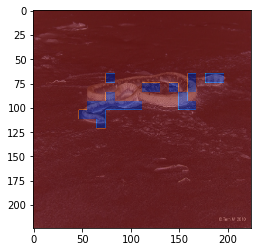

In [1414]:
import cv2
from torch import Tensor
import matplotlib.pyplot as plt

transformations =  transforms.Compose([
     transforms.PILToTensor(),
     transforms.Resize((384, 384))
 ])

def plot_scores(scores: torch.Tensor, file_name: str, iteration_idx: int, image_plot_folder_path: Union[str, Path],
                image_size: int = 384,
                patch_size: int = 16) -> None:
    num_patches = (image_size // patch_size) * (image_size // patch_size)

    if len(scores.shape) == 1:
        scores = scores.unsqueeze(0)
    if scores.shape[-1] == num_patches + 1:
        scores = scores[:, 1:]

    w_featmap, h_featmap = image_size // patch_size, image_size // patch_size
    scores = scores.reshape(1, w_featmap, h_featmap)
    scores = nn.functional.interpolate(scores.unsqueeze(0), scale_factor=patch_size, mode="nearest")[
        0].cpu().detach().numpy()
    scores_image = scores[0]
#     plt.imsave(fname=Path(image_plot_folder_path, f'{file_name.replace(" ", "")[:45]}_iter_{iteration_idx}.png'), arr=scores_image,
#                format='png')
#     plt.imshow(scores_image, interpolation='nearest')
#     plt.show()
    return scores_image

def save_saliency_map(image: Tensor, saliency_map: Tensor):#, filename):
    """
    Save saliency map on image.
    Args:
        image: Tensor of size (3,H,W)
        saliency_map: Tensor of size (1,H,W)
        filename: string with complete path and file extension
    """

    image = image.data.numpy()
    saliency_map = saliency_map

    saliency_map = saliency_map - saliency_map.min()
    saliency_map = saliency_map / saliency_map.max()
    saliency_map = saliency_map.clip(0, 1)

    saliency_map = np.uint8(saliency_map * 255).transpose(1, 2, 0)
    saliency_map = cv2.resize(saliency_map, (224, 224))

    image = np.uint8(image * 255).transpose(1, 2, 0)
    image = cv2.resize(image, (224, 224))

    # Apply JET colormap
    color_heatmap = cv2.applyColorMap(saliency_map, cv2.COLORMAP_JET)

    # Combine image with heatmap
    img_with_heatmap = np.float32(color_heatmap) + np.float32(image)
    img_with_heatmap = img_with_heatmap / np.max(img_with_heatmap)
    plt.imshow(img_with_heatmap, interpolation='nearest')
    plt.show()
    return img_with_heatmap
#     cv2.imwrite(filename, np.uint8(255 * img_with_heatmap))

heatmap_img = save_saliency_map(transformations(image), torch.tensor(plot_scores(heatmap, '','', '')).unsqueeze(0))

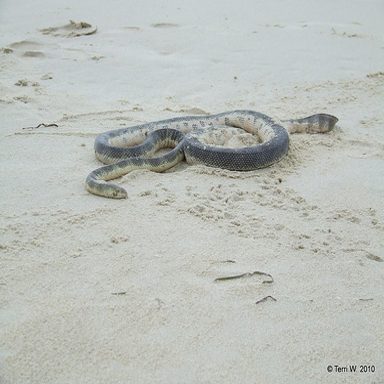

In [1420]:
image.resize((384, 384))

In [1369]:
t(image).data.numpy()

array([[[178, 177, 179, ..., 187, 185, 185],
        [174, 178, 181, ..., 186, 186, 186],
        [179, 180, 181, ..., 186, 187, 187],
        ...,
        [162, 167, 161, ..., 177, 164, 165],
        [161, 165, 169, ..., 154, 167, 167],
        [159, 160, 168, ..., 182, 172, 176]],

       [[188, 187, 189, ..., 199, 197, 197],
        [184, 188, 191, ..., 198, 198, 198],
        [189, 190, 191, ..., 196, 197, 197],
        ...,
        [163, 170, 165, ..., 179, 165, 166],
        [164, 168, 171, ..., 156, 168, 168],
        [164, 163, 169, ..., 185, 175, 179]],

       [[190, 189, 191, ..., 199, 197, 197],
        [186, 190, 193, ..., 198, 198, 198],
        [191, 192, 193, ..., 197, 198, 198],
        ...,
        [157, 163, 159, ..., 168, 156, 159],
        [157, 161, 165, ..., 145, 159, 162],
        [157, 157, 164, ..., 174, 165, 172]]], dtype=uint8)

In [1279]:
Image.open(p).resize((384,384)).save("vulture_18_384x384.JPEG", "JPEG")

In [1226]:
torch.argmax(losses)

TypeError: argmax(): argument 'input' (position 1) must be Tensor, not list

In [993]:
torch.equal(x_attention[0], x_attention[-1])

False

In [995]:
sigmoid(x_attention[0])[:10]

tensor([0.7495, 0.2747, 0.4408, 0.4277, 0.2540, 0.6123, 0.3783, 0.2613, 0.8862,
        0.2431], grad_fn=<SliceBackward>)

In [996]:
sigmoid(x_attention[-1])[:10]

tensor([0.7494, 0.2748, 0.4409, 0.4279, 0.2541, 0.6125, 0.3784, 0.2614, 0.8863,
        0.2432], grad_fn=<SliceBackward>)

In [987]:
sigmoid(x_attention[0])[1].item()

0.27457359433174133

In [986]:
sigmoid(x_attention[-1])[1].item()

0.27457359433174133

In [ ]:
target_logits = torch.tensor([[-3.9273e-01,  3.1735e-01,  8.1970e-01, -7.1988e-01, -1.3649e-01,
         -2.2875e-02, -7.7047e-01, -7.5179e-01, -6.2373e-01, -9.4284e-01,
          2.8975e-02, -8.9491e-01, -9.9614e-03, -1.4140e+00, -1.4055e-01,
         -7.5137e-01, -3.1983e-01, -8.2182e-01, -6.6542e-01,  7.0812e-02,
         -1.0423e+00, -2.2237e-01, -3.7388e-01,  2.8470e-01, -2.5762e-01,
         -1.4207e+00, -8.4373e-01, -5.6780e-01, -4.6028e-01, -4.7836e-01,
         -6.9453e-01, -1.7066e+00, -7.3086e-01, -5.1684e-01, -7.8697e-01,
         -3.6287e-02, -6.0498e-01, -2.6451e-01, -7.5065e-01, -1.1447e+00,
         -1.0333e+00, -6.8981e-01, -6.0695e-01, -1.1224e+00, -1.0193e+00,
         -3.1972e-01, -1.7838e+00, -1.1223e+00, -9.8859e-01, -8.9459e-01,
         -1.3629e+00, -6.2128e-01, -4.7747e-02,  3.4124e-01,  4.9643e-01,
         -2.4643e+00, -3.9674e-01, -3.5801e-01,  2.3322e-01, -1.0644e+00,
         -1.0157e-02, -1.2912e+00, -1.0452e-01, -8.3455e-01, -1.9284e+00,
         -1.2837e-01,  2.9326e-02,  3.3338e-01,  5.3930e-01, -2.4715e-01,
          6.0008e-02,  2.5215e-01, -1.0511e+00, -2.9586e-01, -9.9934e-01,
         -4.2033e-01, -7.5508e-01,  1.5511e-01,  3.4044e-01,  7.4402e-01,
         -2.5016e-01, -7.6942e-01, -8.3681e-01, -7.1406e-01, -1.1053e-01,
         -3.7711e-01, -6.5584e-01, -3.6634e-03, -1.0670e+00, -4.0801e-01,
          2.9066e-01,  3.0727e-01,  3.2476e-01, -2.3520e-01, -5.1073e-03,
         -3.4919e-01, -1.1414e+00, -1.7572e-01, -5.7798e-01, -6.1434e-01,
         -5.9402e-01,  8.0377e-01, -5.0613e-01, -9.8984e-01, -4.5044e-01,
         -7.3851e-01,  2.3000e-02, -1.3053e+00,  1.0424e+00, -2.9236e-01,
         -2.4586e-01,  8.1766e-01,  4.5334e-01, -3.3246e-01,  8.3765e-02,
         -3.9505e-01,  5.3037e-01, -7.8260e-02,  1.8646e+00,  6.6404e-01,
         -5.6902e-01,  1.5175e+00,  1.4164e+00,  1.1400e-01,  8.7955e-02,
         -1.2492e-04,  3.5843e-01, -8.9901e-01, -1.2109e+00, -9.0449e-01,
         -7.0624e-01, -1.7569e+00, -7.2961e-01, -1.4067e+00, -7.7935e-02,
         -8.4210e-01, -9.1460e-01, -1.6166e-01, -4.3961e-01, -1.1268e+00,
         -1.1619e+00, -1.1501e+00,  4.7958e-01, -8.4252e-01, -5.6012e-01,
         -8.5890e-01,  5.3153e-01, -4.1881e-01, -7.2757e-01, -9.8197e-01,
          5.7850e-01, -1.4536e+00, -6.3891e-01, -1.1087e+00, -1.2145e+00,
         -1.1218e+00, -1.4817e+00, -1.0370e+00, -4.9096e-01, -5.4075e-01,
         -1.5649e+00, -1.5909e+00, -1.7473e+00, -5.0715e-01, -1.0704e+00,
         -4.4970e-01,  2.7823e-01, -5.7720e-01, -1.1370e-01, -1.0339e+00,
         -9.8930e-01,  1.8522e-01, -1.3917e+00, -1.3841e+00, -4.7848e-01,
         -6.2652e-01, -1.5749e+00, -1.1487e+00, -7.8661e-01, -7.5065e-01,
         -1.3174e-01, -1.6665e+00, -1.1975e+00, -1.0834e+00, -1.8821e+00,
         -3.9008e-01, -1.3333e+00, -7.8632e-01, -1.6034e+00, -9.9870e-01,
         -1.0296e+00, -1.2510e+00, -1.9476e+00, -8.5626e-01, -1.4415e+00,
         -3.4383e-01, -1.5165e+00, -1.7767e+00, -1.9377e+00, -1.2881e+00,
         -1.3773e+00, -1.2768e+00, -1.0579e+00, -1.1777e+00, -1.0755e+00,
         -1.2781e+00, -5.2307e-01, -1.3086e+00, -1.1766e+00, -7.4434e-01,
         -5.0327e-01, -1.4530e+00, -1.3321e+00, -1.2683e+00, -1.4359e+00,
         -3.6466e-01, -8.6358e-01, -4.3810e-01, -1.2335e+00, -1.4031e+00,
          3.6254e-01, -6.3119e-01, -7.6892e-01,  3.9355e-02, -8.6233e-01,
         -7.8565e-01, -9.5294e-01, -8.9337e-01, -1.0569e+00, -1.6613e+00,
         -9.1348e-01, -9.0560e-01, -5.8764e-01, -9.5102e-01, -1.0338e+00,
         -6.9804e-01, -9.0360e-01, -7.1430e-01, -1.2739e+00, -1.2658e+00,
         -1.6301e+00, -1.1021e+00, -4.6970e-02,  5.6645e-01, -5.5252e-01,
         -3.5164e-01, -9.3461e-01, -1.4335e+00, -7.9060e-01, -7.5271e-01,
         -5.8040e-01, -1.2252e+00, -1.3052e+00, -7.9378e-01, -6.7642e-01,
         -9.3866e-01, -1.6964e-01, -5.2393e-01, -9.2135e-01, -5.3388e-01,
         -3.5760e-01, -6.6025e-01, -1.2801e+00, -6.1968e-01, -1.8168e+00,
         -8.5864e-01, -4.5774e-01, -7.0601e-01, -1.1745e+00, -4.9897e-01,
         -9.0033e-02, -1.0959e+00, -9.3096e-01, -4.7553e-01, -7.5727e-01,
         -7.7926e-01, -6.5119e-01, -1.0163e+00, -7.7284e-01, -8.2274e-01,
         -8.4927e-01, -1.1211e+00, -1.0842e+00, -9.2228e-01,  2.5957e-02,
          1.7141e-01, -8.0459e-01, -1.7434e+00, -2.1887e-01, -5.8305e-01,
         -2.8746e-01,  5.0909e-01, -1.0082e+00, -8.2600e-01, -3.1723e-02,
         -5.6599e-01, -7.5270e-01,  3.3091e-01, -8.4134e-01, -8.6770e-01,
         -6.4407e-01,  4.7606e-01, -2.1439e-01,  3.5457e-01,  3.0672e-01,
          1.7382e-02, -3.5230e-01, -3.6329e-02, -6.2869e-01, -5.9129e-01,
         -2.4469e-01, -6.1258e-01, -1.1605e+00, -6.3597e-01,  4.0202e-01,
         -4.5348e-01, -3.6292e-01, -9.6842e-01, -8.2083e-02, -4.8542e-01,
         -7.7208e-02,  1.1253e-01, -1.4742e+00, -6.3466e-01, -3.0682e-02,
          1.7219e-01, -9.7509e-01,  3.8053e-01,  1.9952e-01,  6.4870e-01,
         -6.2987e-01, -3.1013e-01, -8.5605e-01, -3.0137e-01, -1.1001e+00,
         -3.7546e-01, -9.6223e-01, -3.6005e-01, -5.0768e-01, -1.3542e+00,
         -1.4816e-01, -4.8624e-01, -4.2222e-01, -2.5793e-01, -1.1340e+00,
         -9.4133e-01, -2.9877e-01, -1.1144e+00, -3.1602e-01, -6.6942e-01,
         -1.0939e+00, -1.6957e-01, -1.7122e+00, -1.4387e+00, -5.2423e-01,
         -6.2442e-01, -8.3622e-01, -2.9370e-01, -6.6234e-01, -8.0931e-01,
         -8.2898e-01, -1.4451e+00, -5.8042e-01, -4.3568e-01, -8.8344e-01,
         -4.8892e-01, -1.1415e+00, -4.4220e-01,  4.7344e-02, -3.9291e-01,
         -4.8262e-01, -5.8235e-01, -1.9424e-01, -6.5209e-01, -1.4165e+00,
         -6.5223e-01, -6.4873e-01, -1.1081e+00, -1.0716e+00,  3.5576e-01,
         -1.0940e+00, -6.5293e-01, -9.1580e-01, -8.9112e-01, -2.9672e-01,
          4.2102e-02,  2.3959e-03, -8.7669e-01, -9.4175e-01, -3.8105e-01,
         -4.2848e-01, -6.0051e-01, -5.4144e-02,  4.7852e-01, -1.2721e+00,
         -9.1874e-01, -5.2746e-01, -1.0308e+00,  4.7370e-01, -1.6514e-01,
         -7.1471e-01,  4.4095e-01,  5.6815e-01, -1.0064e+00, -4.1501e-01,
          5.8740e-02,  8.5426e-01,  3.8700e-01, -1.8213e+00,  4.3273e-01,
         -2.2559e-01,  3.9646e-01,  4.3800e-01, -9.3136e-01,  2.8659e-01,
          1.2664e+00, -1.7766e+00, -7.9378e-01,  5.3061e-01, -1.1472e+00,
         -7.7566e-01,  1.1275e-01, -3.6779e-01, -7.8732e-01, -1.0632e-01,
         -4.7218e-01,  9.9647e-01,  4.7169e-01, -5.5807e-01,  5.2716e-01,
         -2.7755e-01,  6.2359e-01, -4.0671e-01, -3.0259e-01, -4.0946e-01,
          2.7542e-01, -3.2786e-01,  2.6742e-02,  1.4002e+00, -9.7622e-01,
          3.9640e-01,  1.6328e+00,  4.7372e-01,  1.0361e+00, -8.1251e-02,
         -7.2255e-01, -4.3826e-01,  7.9555e-02,  1.1206e+00,  2.7333e-03,
         -8.2973e-01, -6.8200e-02, -6.6921e-01,  2.5232e-01, -6.6681e-01,
          1.6987e+00, -1.5563e-01,  1.8608e-01,  5.3522e-01, -1.6157e-01,
         -3.3458e-02, -4.7575e-01,  3.3028e-01,  3.9719e-01,  2.3997e-01,
          4.8640e-01, -6.1771e-02,  7.6156e-02, -5.6724e-01,  4.0275e+00,
          2.6143e+00,  1.8490e-01, -1.1568e+00,  1.8927e+00, -7.0614e-01,
          2.1646e-01, -4.7946e-01,  4.3531e-01,  1.2534e+00,  1.9804e-01,
         -4.4296e-01,  1.2577e+00,  8.7039e-01, -2.7244e-01, -7.5690e-01,
          5.7567e-01, -8.0494e-01, -7.6492e-01,  7.4234e-01, -2.0743e-01,
          1.1456e-01,  2.6965e-01,  1.2191e+00,  3.6507e-01,  1.4685e+00,
          1.5963e+00,  1.0790e+00,  1.0571e+00, -7.6485e-01,  2.6349e-01,
          6.3880e-02, -1.0368e+00, -4.5064e-01,  1.1551e+00,  5.3312e+00,
          1.7003e+00,  5.2314e-01,  1.2504e+00, -1.7472e-02, -8.0405e-01,
          7.8149e-02, -3.3457e-01,  1.5893e+00, -1.2162e+00, -8.9138e-01,
         -1.0037e+00, -6.4151e-01, -1.4874e-01,  1.6810e+00,  3.0577e-01,
         -1.3782e-01,  3.2066e+00,  3.9162e-02, -2.8756e-02, -1.0470e+00,
          4.6298e-01,  8.8108e-02, -3.1115e-01, -2.9452e-01, -7.4868e-01,
          5.3436e-01, -9.1786e-02,  1.2904e+00,  7.4856e-02,  7.6557e-01,
          6.3028e-01, -7.1559e-02, -8.9784e-01,  5.5965e-01, -5.8303e-01,
         -6.0511e-02, -7.4572e-01, -3.0408e-01, -1.1778e+00,  2.6165e+00,
         -1.3302e-01, -6.9096e-01, -3.8144e-01, -2.0381e-01, -3.5740e-01,
          1.4740e+00,  4.9684e-01, -1.0052e+00,  2.2238e-01, -2.8647e-01,
         -7.7453e-01,  1.4228e+00, -3.3999e-01, -7.4194e-01,  8.7819e-01,
         -1.3728e-02, -2.6086e-01,  4.2271e-01,  1.4322e+00, -6.1470e-01,
          6.3856e-01, -5.1734e-01,  1.6876e+00, -5.4865e-01, -8.3771e-01,
         -3.8305e-01,  6.8337e-01,  2.5785e+00, -9.7832e-01,  3.4842e-01,
         -3.6075e-01, -1.0286e-01,  9.5571e-03, -5.7538e-01, -1.4608e-01,
          1.3423e-01, -3.4622e-01,  1.3783e+00,  8.6579e-01,  1.2215e+00,
         -1.2002e+00, -7.3277e-01,  8.5835e-01, -1.1223e+00, -6.7185e-01,
          9.8624e-02,  8.7343e-01, -4.6484e-01,  2.8589e-01, -8.6783e-01,
         -5.1574e-01, -7.1610e-02, -9.7164e-01, -6.8004e-01,  4.0660e-01,
          1.0498e+00, -9.1817e-01, -1.3161e+00, -4.4835e-01,  1.4204e+00,
          1.0727e-01,  1.5958e-01,  1.7734e-01, -3.2307e-01, -4.5395e-01,
         -2.2351e+00, -3.7812e-01, -1.1389e+00, -4.6398e-01, -3.6395e-01,
          5.9363e-01, -4.0287e-01, -6.5697e-01,  6.2163e+00,  1.3282e+00,
         -7.4821e-01, -1.8990e-01,  1.6939e+00,  1.7352e+00, -1.4266e-01,
          4.6101e-01,  1.1810e+00, -1.3035e+00, -5.7274e-01, -1.5836e-01,
         -1.1513e+00,  6.0273e-01, -9.0528e-01,  9.2415e-01,  1.8381e-01,
          3.0995e-01, -4.3010e-01,  1.8943e-01, -7.1051e-01, -3.7927e-01,
          3.5684e-01,  4.8725e-02,  3.4827e-01,  3.8217e-02,  1.2813e+00,
         -7.5764e-01, -3.7260e-01,  4.1788e+00,  4.4877e-01,  1.3731e-01,
         -4.0823e-01,  1.0063e+00, -8.1199e-01,  9.2306e-01, -1.0453e+00,
         -4.5575e-01,  1.0485e-02,  2.1710e-02,  6.4609e-01,  6.4521e+00,
          1.2995e-01, -4.6636e-01, -5.3218e-01,  6.0726e-01, -2.8346e-01,
         -1.6360e+00,  3.1916e+00,  1.4265e-04, -4.1246e-01, -4.6302e-01,
         -1.4335e+00,  2.5660e-01, -5.7765e-01,  7.4236e-01,  1.3156e+00,
          2.7580e-02, -4.0335e-01,  1.3784e+00, -2.5875e-01, -1.4011e-01,
          7.2981e-01, -8.3485e-01,  5.6237e-01, -8.2389e-01,  2.9910e-01,
         -4.0124e-02,  1.4870e+00,  9.5292e-02,  4.0755e-01, -6.1799e-01,
          1.6817e-01,  2.1807e-01,  4.2798e+00,  1.3676e-01, -4.1722e-01,
          6.6419e-01,  9.4479e-01, -2.3040e-01, -5.4226e-01,  5.7225e-01,
          8.4959e-01, -8.1552e-02, -6.1728e-01, -3.8850e-01, -1.7402e-01,
         -2.1451e-01,  5.2369e-04, -4.1916e-01,  5.4873e-01,  7.0733e-02,
          6.9610e-01,  5.5672e-01,  2.3479e+00, -2.5475e-01,  7.8105e-01,
          4.3410e-02,  2.1334e-01, -5.6694e-01,  3.4063e-01,  1.4263e+00,
          9.1288e-01, -5.8789e-01,  9.9713e-01,  9.9283e-02, -2.8296e-01,
          3.5249e+00,  6.9729e-01, -9.0359e-01, -3.6410e-01,  1.6411e+00,
         -2.5948e-01,  1.0307e+00, -1.9478e-01,  8.2702e-01, -7.3106e-01,
         -8.7695e-01, -6.0840e-01,  2.2655e+00,  2.2482e+00, -4.7147e-02,
          1.4387e-01, -6.8369e-01, -6.2510e-01,  1.3264e-01, -1.2984e-01,
         -7.9965e-01,  1.6150e+00, -2.8828e-01,  4.4475e-01,  7.5078e-01,
          5.3931e-01, -4.1340e-01, -1.0241e-01,  1.8772e+00,  4.6861e-01,
         -6.9327e-01,  1.3900e-01,  2.5656e-01,  2.7636e-01,  1.0756e+00,
          1.4652e+00,  1.0531e-01,  2.1424e+00, -4.0757e-01, -2.5586e-01,
         -6.4028e-01,  7.4308e-01,  3.2917e-01,  6.4142e-02,  3.6200e-01,
         -3.2274e-01,  2.9813e-01,  4.4791e-01,  3.5897e+00, -1.1598e+00,
         -1.8637e-01, -3.5402e-01,  3.3773e-01,  4.8836e-01, -8.8387e-01,
         -7.8410e-01,  3.9691e-01,  1.4952e-01,  9.3553e-01,  1.6716e+00,
          2.1778e-01, -7.9522e-02, -3.3279e-01, -1.2220e+00,  5.4254e-01,
          7.2490e-01,  1.0626e-02, -2.8312e-02, -4.0794e-01, -7.5002e-01,
         -3.3131e-01,  1.0663e-01, -3.6520e-01, -6.4245e-02,  1.9135e-01,
          1.2800e-01, -1.7105e-01, -1.2683e+00, -7.4528e-01,  1.5929e+00,
         -1.2500e+00, -3.6335e-01,  5.8919e-01,  1.6802e-01,  1.4397e+01,
         -2.4080e-01,  1.5430e+00,  6.3519e-02,  2.2191e+00, -1.1896e-01,
          5.0587e-01,  6.5654e-01, -1.7231e+00,  8.2223e-01, -8.6912e-01,
         -3.6701e-01, -3.6424e-01, -7.2556e-01,  6.2749e-01, -7.4993e-01,
         -2.5354e-01,  3.7529e-01,  2.1788e+00,  4.3961e+00, -9.3365e-01,
         -7.0299e-01,  8.1610e-01,  6.9710e-01, -7.2057e-01, -4.7622e-01,
          3.9901e-01,  4.8026e-01,  2.3078e-01,  1.0170e+00, -7.0391e-01,
          9.5672e-01, -1.2315e+00, -6.8934e-01, -1.0136e+00,  8.7392e-01,
          1.3029e+00,  8.3235e-01, -6.8980e-01,  1.2055e+00,  3.5160e+00,
         -1.1181e+00,  2.0050e-01, -5.3871e-01,  5.4023e-01, -8.2583e-01,
          1.0256e+00, -2.7246e-01, -1.1163e-01,  1.0121e+00,  2.0151e+00,
         -1.3869e-01, -2.2898e-01,  2.6448e-01,  5.3334e-01,  4.2756e-02,
         -1.5354e+00, -5.2442e-01,  4.7332e-01,  3.1394e+00, -1.1756e+00,
         -5.7300e-01, -7.1820e-01,  9.0934e-01,  6.9531e-01, -7.2662e-01,
          1.5109e-01, -7.6940e-01, -6.0975e-01,  2.3840e-01, -6.9229e-01,
         -5.4979e-01, -5.8292e-03,  1.8894e-01,  1.4795e+00,  1.1197e+00,
         -2.4897e-01,  1.6521e-01, -3.6321e-01,  4.6985e-01, -1.0348e+00,
         -5.0867e-01,  1.8425e+00,  7.0420e-01,  5.1958e-01,  7.4519e-02,
         -9.7512e-01,  3.1365e+00,  3.8693e-01,  9.0688e-01,  3.1407e+00,
         -4.1727e-01,  2.0451e+00, -2.5522e-01, -1.5085e+00,  2.2730e-01,
          7.7981e-01, -3.2782e-02,  1.2418e+00,  2.6221e-01,  3.0884e+00,
          4.9692e+00,  4.9202e-01, -1.1853e+00, -1.3981e-01, -5.0758e-01,
         -2.0052e-01, -8.6415e-01, -2.6902e-01,  1.8428e+00, -3.4760e-01,
         -5.6546e-01,  5.3635e-01,  1.5620e+00,  4.9471e+00,  3.1679e+00,
          1.1163e+01,  4.2136e+00,  2.9272e+00,  2.7775e+00, -5.1878e-01,
          2.4717e+00,  3.2402e+00,  2.2649e+00,  1.2422e+00,  2.2343e+00,
          4.2422e+00,  1.9535e+00,  2.6828e+00,  3.3004e+00,  1.5521e+00,
          2.6506e+00,  1.8632e+00,  4.3766e+00,  2.2662e+00,  7.6883e-01,
          1.1540e+00, -5.4673e-02,  2.3128e+00,  1.8749e+00,  1.2497e+00,
          1.5796e+00,  2.0727e+00,  7.0457e-01,  5.1799e-01,  9.9656e-01,
          6.3333e-01,  5.9048e-02,  1.2578e+00, -1.5561e+00,  4.0087e+00,
          2.1120e+00,  1.6337e+00,  1.9190e+00,  1.1955e-01,  3.9190e+00,
          2.2449e+00,  2.1299e+00,  6.3136e+00,  6.4974e+00,  7.8313e+00,
          1.5220e-02, -4.9063e-02,  4.5072e-01, -3.0965e-01, -6.6871e-01,
          4.5227e-01, -2.9990e-01, -1.4851e-02,  3.1585e-01,  5.7216e-02,
         -1.0250e+00, -4.1397e-01, -3.1580e-01, -5.7666e-01, -2.4575e-01,
         -6.9428e-01, -1.4158e+00,  3.4486e+00,  9.5352e-01,  6.4331e-01,
          3.1966e-01,  7.9647e-01,  2.3397e-01, -7.0172e-01, -3.8290e-02,
          9.3786e-02,  1.3178e+00,  2.1273e-01,  1.8546e+00, -3.8259e-01]])

In [998]:
target_logits.shape

torch.Size([1, 1000])

In [1004]:
bcelo(target_logits, target_logits)

tensor(-0.8533)

In [1026]:
a = torch.randn_like(target_logits[:,:4])

In [1105]:
a, sigmoid(a)

(tensor([[-0.5625, -1.4612,  0.1259,  1.0312]]),
 tensor([[0.3630, 0.1883, 0.5314, 0.7372]]))

In [1108]:
cross_entropy(sigmoid(a), sigmoid(a))

tensor([0.5307, 0.4536, 0.4847, 0.3243])

In [1039]:
bcewithlo(a, sigmoid(a))

tensor(0.6015)

In [1052]:
sigmoid(a), sigmoid(a)

(tensor([[0.3630, 0.1883, 0.5314, 0.7372]]),
 tensor([[0.3630, 0.1883, 0.5314, 0.7372]]))

In [1053]:
bce(sigmoid(a),sigmoid(a))

tensor(0.6015)

In [1057]:
for c in sigmoid(a):
    print(c * np.log(c) + (1-c) * np.log(1 - c))

tensor([-0.6551, -0.4837, -0.6912, -0.5760])


In [1049]:
from datetime import datetime as dt

In [1050]:
s = dt.now()

In [1051]:
print(dt.now() - s)

0:00:04.582535


In [1028]:
a

tensor([[-0.5625, -1.4612,  0.1259,  1.0312]])

In [1060]:
kl_loss(sigmoid(a), sigmoid(a))

C:\Users\asher\Anaconda3\envs\explainability\lib\site-packages\torch\nn\functional.py:2742: UserWarning: reduction: 'mean' divides the total loss by both the batch size and the support size.'batchmean' divides only by the batch size, and aligns with the KL div math definition.'mean' will be changed to behave the same as 'batchmean' in the next major release.
  "reduction: 'mean' divides the total loss by both the batch size and the support size."


tensor(-0.5590)